# Exercise 1.1

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [1]:
preg.birthord.value_counts().sort_index()

NameError: name 'preg' is not defined

We can also use `isnull` to count the number of nans.

In [14]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [8]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [6]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [8]:
preg["totalwgt_kg"] = preg["totalwgt_lb"] / 2.2046
preg.totalwgt_kg.mean()

3.29566744879946

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [27]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [11]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [17]:
resps = resp.age_r.value_counts().sort_index()
print(resps)
print('Youngest respondents age :',resps.index.tolist()[0])
print('Oldest respondents age :',resps.index.tolist()[len(resps.index.tolist())-1])

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64
Youngest respondents age : 15
Oldest respondents age : 44


We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [21]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [22]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750


How old is the respondent with `caseid` 1?

In [24]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [25]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [28]:
preg[preg.caseid==5012].totalwgt_lb

5515    6.0
Name: totalwgt_lb, dtype: float64

# Exercise 1.2

In [2]:
from __future__ import print_function, division

import numpy as np
import sys

import nsfg
import thinkstats2


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Function for reading the NSFG respondent data."""
    
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    # returns respondent dataframe.
    return df


def ValidatePregnum(resp):
    """Function for validating pregnum in respondent file."""
    
    # read the pregnancy frame
    preg = nsfg.ReadFemPreg()

    # make the map from caseid to list of pregnancy indices
    preg_map = nsfg.MakePregMap(preg)
    
    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False
    
        print(str(caseid) + '\t' + str(len(indices)) + '\t' + str(pregnum))


def main():
    # Getting all the respondents data.
    resp = ReadFemResp()
    # Printing the count of respondents by no. of pregnancies.
    print('No. of pregnancies by count:')
    print(resp.pregnum.value_counts().sort_index())
    # Printing the respondent and pregnancy files by comparing pregnum for each respondent with the number of records in the pregnancy file.
    print('\nThe respondent and pregnancy files that match the indices and pregnum:')
    ValidatePregnum(resp)
    

if __name__ == '__main__':
    main()




No. of pregnancies by count:
0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64

The respondent and pregnancy files that match the indices and pregnum:
2298	4	4
5012	1	1
11586	1	1
6794	0	0
616	0	0
845	8	8
10333	0	0
855	0	0
8656	3	3
3566	0	0
5917	2	2
9200	1	1
6320	2	2
11700	2	2
7354	7	7
3697	0	0
4881	3	3
5862	4	4
8542	2	2
2054	3	3
3719	1	1
11740	5	5
11343	3	3
7075	3	3
5422	2	2
2178	2	2
8358	0	0
5083	2	2
1545	2	2
5656	2	2
9334	4	4
5507	3	3
611	0	0
4260	2	2
11767	3	3
5573	5	5
11901	1	1
8975	1	1
5267	3	3
910	1	1
4463	4	4
8954	1	1
1814	3	3
7011	4	4
4057	2	2
7081	4	4
5499	1	1
6551	5	5
9242	0	0
11408	5	5
7168	3	3
2339	1	1
4138	0	0
8785	1	1
1511	3	3
2240	0	0
8190	0	0
5278	1	1
469	0	0
5351	5	5
10633	1	1
11058	2	2
3329	0	0
3814	2	2
4966	2	2
4327	2	2
6908	1	1
9302	4	4
4627	0	0
8085	1	1
9555	3	3
1821	2	2
319	4	4
10295	1	1
8269	3	3
4693	0	0
6370	1	1
8628	4	4


5313	0	0
11557	1	1
880	2	2
9415	2	2
4833	1	1
4020	3	3
9855	2	2
3972	2	2
9258	3	3
713	0	0
11625	2	2
665	3	3
3753	3	3
2141	3	3
7237	0	0
9914	0	0
1803	2	2
5966	2	2
10750	1	1
10548	0	0
12317	2	2
7869	3	3
259	3	3
9596	0	0
2472	3	3
2624	6	6
1930	0	0
9692	0	0
7171	0	0
12043	3	3
1223	2	2
1608	0	0
10794	2	2
5792	1	1
9961	0	0
284	5	5
11569	5	5
9293	1	1
10321	3	3
3352	2	2
6682	0	0
1107	1	1
11984	0	0
1438	1	1
354	2	2
6773	1	1
7275	4	4
8912	2	2
4095	1	1
4684	3	3
5129	1	1
6862	0	0
247	2	2
10356	1	1
7673	0	0
11733	3	3
7077	0	0
7058	1	1
7455	0	0
291	0	0
3733	3	3
4224	2	2
10700	0	0
2370	4	4
10349	3	3
8697	0	0
6430	1	1
4018	4	4
10167	0	0
433	0	0
7419	8	8
3788	3	3
442	1	1
6187	5	5
1924	1	1
9524	0	0
10355	6	6
5289	1	1
6297	11	11
2229	1	1
936	0	0
2129	3	3
10905	0	0
3162	1	1
5820	2	2
3025	5	5
92	3	3
9364	0	0
11996	2	2
12041	3	3
2578	0	0
7922	1	1
11641	4	4
4102	2	2
1304	2	2
9102	3	3
11172	1	1
1730	0	0
1102	0	0
5013	4	4
2606	0	0
12355	0	0
10711	3	3
761	5	5
11416	0	0
10341	1	1
2423	0	0
2438	1	1
5423	0	0
2191	4

345	0	0
3759	3	3
865	4	4
9397	0	0
8294	0	0
8727	2	2
9762	2	2
8652	1	1
8799	0	0
8213	0	0
6579	1	1
3061	1	1
1301	0	0
11122	1	1
482	0	0
10575	3	3
11104	4	4
8528	3	3
10035	2	2
8209	3	3
4167	1	1
4937	1	1
3060	4	4
2520	2	2
10763	3	3
11719	1	1
12462	0	0
4801	1	1
2253	2	2
2119	1	1
5390	1	1
1298	1	1
9722	2	2
4798	2	2
7317	0	0
5583	5	5
4196	4	4
7612	3	3
10517	1	1
2134	1	1
2312	4	4
11158	1	1
2365	1	1
6509	0	0
8700	1	1
1757	1	1
5324	3	3
9505	0	0
928	2	2
485	0	0
7559	0	0
4073	0	0
5532	2	2
899	2	2
4797	4	4
2453	0	0
11925	0	0
9393	2	2
7264	0	0
10646	0	0
8070	2	2
11805	1	1
3263	0	0
80	5	5
2648	4	4
8846	3	3
4802	3	3
712	3	3
7691	0	0
12383	1	1
6560	6	6
2223	0	0
131	0	0
5790	5	5
2924	5	5
9096	4	4
12295	2	2
12278	1	1
7719	3	3
8559	7	7
7197	1	1
8797	6	6
8254	5	5
3072	4	4
4168	5	5
11035	3	3
9857	0	0
3273	2	2
5459	3	3
764	0	0
4313	2	2
3199	1	1
10251	1	1
10587	1	1
3376	1	1
3927	3	3
5984	1	1
7366	0	0
3471	0	0
2599	0	0
9835	0	0
4255	2	2
2684	3	3
71	1	1
11393	0	0
2732	7	7
5051	0	0
9351	0	0
3836	1	1
9702	0	0
9157

3228	0	0
4735	0	0
10503	0	0
10464	0	0
660	0	0
9180	0	0
2861	0	0
1046	0	0
4708	0	0
4550	0	0
1178	0	0
3614	0	0
12457	0	0
11381	0	0
1809	0	0
11003	0	0
6915	0	0
7495	0	0
11286	0	0
3220	0	0
8809	0	0
3338	0	0
4886	3	3
7271	2	2
33	0	0
5812	0	0
7605	0	0
8684	1	1
4754	2	2
10724	2	2
9899	3	3
7690	0	0
6992	0	0
9663	2	2
250	0	0
2734	1	1
11541	0	0
5897	3	3
3900	0	0
9800	1	1
2	3	3
7120	0	0
7529	0	0
1599	2	2
3177	0	0
573	3	3
7494	3	3
11153	1	1
6604	4	4
4821	4	4
11506	6	6
11523	3	3
4912	4	4
11674	3	3
8726	0	0
4686	0	0
3215	0	0
8553	1	1
11495	3	3
567	3	3
11732	5	5
9053	3	3
12418	2	2
446	0	0
4486	2	2
7541	4	4
4428	0	0
10442	8	8
10667	4	4
3779	1	1
2722	0	0
9960	2	2
11205	0	0
429	1	1
4089	0	0
11957	1	1
11180	1	1
10446	0	0
9815	3	3
8997	2	2
7522	0	0
10405	3	3
1052	0	0
4473	0	0
9986	3	3
1456	1	1
6259	2	2
10411	3	3
3901	2	2
6679	4	4
86	3	3
5271	6	6
10125	3	3
10682	0	0
5132	0	0
1558	1	1
9172	0	0
10689	3	3
11165	3	3
7749	3	3
8228	3	3
3737	3	3
1647	2	2
3642	2	2
10603	2	2
6686	2	2
3546	7	7
7090	1	1
10542	2	2
346

# Exercise 2.1 

Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late. 

Which summary statistics would you use if you wanted to get a story on the evening news? 

To create a story on evening news on to find whether first babies arrive late, I would use the most common summary statistic ‘mean’, which is meant to describe the central tendency of distribution. In this scenario, we can determine the answer by using the average pregnancy length of n women. Additionally, we could use the standard deviation to show the expected deviations.

Which ones would you use if you wanted to reassure an anxious patient? 

To reassure an anxious patient, we could use the ‘effect size’ summary statistic or by calculating Cohen’s d, by calculating the difference in the means of two groups i.e., firsts and others. Though the difference is of small fraction, this estimate could be accurate and could be used to assure an anxious patient. However, it is unlikely that anyone would notice this fractional difference at all.

Finally, imagine that you are Cecil Adams, author of The Straight Dope (http://straightdope.com), and your job is to answer the question, “Do first babies arrive late?” Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.

According to histogram plot data, first babies’ pregnancy length is less than other babies’ pregnancy length which means first babies do not arrive late. 

             
Histograms are useful because they make the most frequent values immediately apparent. But they are not the best choice for comparing two distributions. In this example, there are fewer “first babies” than “others,” so some of the apparent differences in the histograms are due to sample sizes.

To answer this precisely, we can use summary statistics to calculate mean, standard deviation and variance. For all live births, the mean pregnancy length is 38.6 weeks, the standard deviation is 2.7 weeks, which means we should expect deviations of 2-3 weeks to be common. Variance of pregnancy length is 7.3, which is hard to interpret, especially since the units are weeks2 , or “square weeks.” Variance is useful in some calculations, but it is not a good summary statistic.
We don’t need Variance because it gives a minute difference between 2 groups.

Another statistic effect size is intended to describe the size of an effect. For example, to describe the difference between two groups, one obvious choice is the difference in the means. Mean pregnancy length for first babies is 38.601; for other babies it is 38.523. The difference is 0.078 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this difference is about 0.2% which is too small, so we cannot use this statistic.

Overall, we can use the Histogram and Mean to answer the question, “Do first babies arrive late?”. The answer it seems to be,  No – the first babes arrive little early compared to the other babies that are not first for their moms.

 


# Exercise 2.4

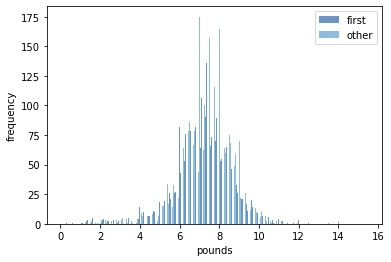

mean difference in weight -0.13
variance difference in weight 0.08
standard deviation difference in weight 0.03
Cohen's difference between two groups of total weight: -0.089
Cohen's difference between two groups of pregnancy length: 0.029


<Figure size 576x432 with 0 Axes>

In [3]:
import thinkstats2
import thinkplot
import nsfg
import math

def CohenEffectSize(group1, group2):
    """Function to calculate cohen's d to quantify the difference between the groups."""
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

# Getting the pregnancy data to preg dataframe.
preg = nsfg.ReadFemPreg()

# Getting the Live birth's dataframe from preg dataframe.
live = preg[preg.outcome == 1]

# dividing to two dataframes of first and other births.
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Creating two histograms of first and other births by total weight in lb's.
first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='first')
other_hist = thinkstats2.Hist(others.totalwgt_lb, label='other')

# Plotting two histograms side by side to compare.
width = 0.02
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

# Calculating mean and variance by weight.
mean1 = round(firsts.totalwgt_lb.mean(),2)
mean2 = round(others.totalwgt_lb.mean(),2)
var1 = round(firsts.totalwgt_lb.var(),2)
var2 = round(others.totalwgt_lb.var(),2)
std1 = round(firsts.totalwgt_lb.std(),2)
std2 = round(others.totalwgt_lb.std(),2)

print('mean difference in weight', round(mean1-mean2,2))
print('variance difference in weight', round(var1-var2,2))
print('standard deviation difference in weight', round(std1-std2,2))

# Calculating and printing cohen's d by weight.
cohen_diff = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
print("Cohen's difference between two groups of total weight:", round(cohen_diff,3))

# Calculating and printing cohen's d by pregnancy length.
cohen_diff1 = CohenEffectSize(firsts.prglngth, others.prglngth)
print("Cohen's difference between two groups of pregnancy length:", round(cohen_diff1,3))


# Exercise 2.4 

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

 
From the above histogram plot, we can see that first babies are lighter than the other babies. Based on the other summary statistics we have seen that there is not much difference in value for Mean, Variance and Standard deviation. So, we can conclude this question based on the histogram plot that first babies are relatively lighter than the other babies.

Cohen’s difference between two groups for total weight and pregnancy length has been calculated above. Cohen’s difference between two groups for total weight is -0.089 which is negative that means that there is no improvement/significant difference between both groups. Also, Cohen’s difference between two groups for pregnancy length is 0.029 which is small too. So these two values doesn’t add any weight to our investigation.
